In [7]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

In [8]:
!pip install texthero -U
!pip install -U spacy
!pip install wordcloud
!pip install -U textblob
!python -m textblob.download_corpora
import seaborn as sns
import texthero as hero
from texthero import stopwords
import os
from wordcloud import WordCloud
import nltk
nltk.download('wordnet')
from nltk.stem import WordNetLemmatizer
from textblob import TextBlob,Word

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Using cached spacy-2.3.8-cp38-cp38-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (5.0 MB)
  Using cached catalogue-1.0.2-py2.py3-none-any.whl (16 kB)
  Using cached thinc-7.4.6-cp38-cp38-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (1.1 MB)
  Using cached srsly-1.0.6-cp38-cp38-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (211 kB)
  Attempting uninstall: srsly
    Found existing installation: srsly 2.4.5
    Uninstalling srsly-2.4.5:
      Successfully uninstalled srsly-2.4.5
  Attempting uninstall: catalogue
    Found existing installation: catalogue 2.0.8
    Uninstalling catalogue-2.0.8:
      Successfully uninstalled catalogue-2.0.8
  Attempting uninstall: thinc
    Found existing installation: thinc 8.1.5
    Uninstalling thinc-8.1.5:
      Successfully uninstalled thinc-8.1.5
  Attempting uninstall: spacy
    Found existing installation: spacy 3.4.3
    Uninstalling spacy-3.4.

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [3]:
from google.colab import files
uploaded = files.upload()

Saving toxiccomments.csv to toxiccomments (1).csv


In [16]:
df = pd.read_csv("toxiccomments.csv")

In [9]:
df.head()

,Unnamed: 0,Unnamed: 0.1,text,sentiment,len
0,0,0,make straw man argument never claim donohue po...,0,65
1,1,1,december utc yep lol reformist party serbia re...,0,80
2,2,2,friesers opinion simple guess kursk turn point...,0,37
3,3,3,please see ref article mention wikipedia young...,0,96
4,4,4,deletion account ok blueboy edit l31 g0ng l41 ...,0,143


In [10]:
df['sentiment'][5000]

1

In [11]:
df.shape

(49974, 5)

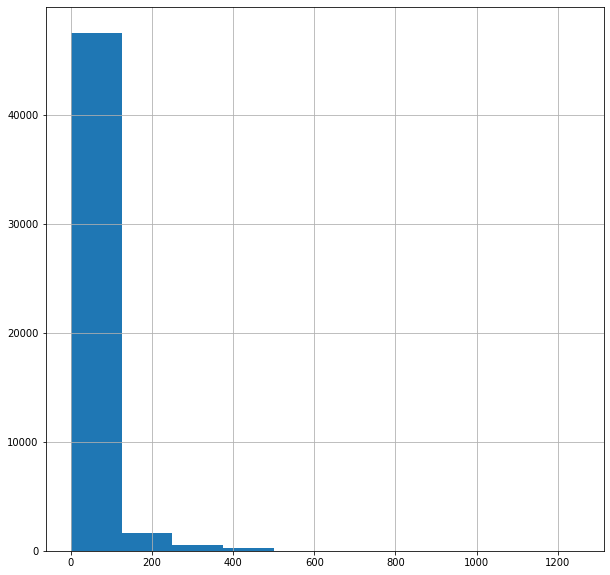

In [12]:
f = plt.figure()
f.set_figwidth(10)
f.set_figheight(10)
df['len'].hist()

In [13]:
text= ' '.join(t for t in df['text'])
words_list= text.split()
word_freq= dict()
for word in set(words_list):
  word_freq[word] = 0
for word in words_list:
  word_freq[word] += 1   
df_word= pd.DataFrame(word_freq.items(),columns=['word','count'])
df_word['word_len']= df_word['word'].map(lambda x: len(x))
df_word=df_word.sort_values('count',ascending=False).reset_index(drop=True)
df_word.head()

,word,count,word_len
0,article,24059,7
1,page,18062,4
2,wikipedia,15155,9
3,use,10316,3
4,edit,9973,4


/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


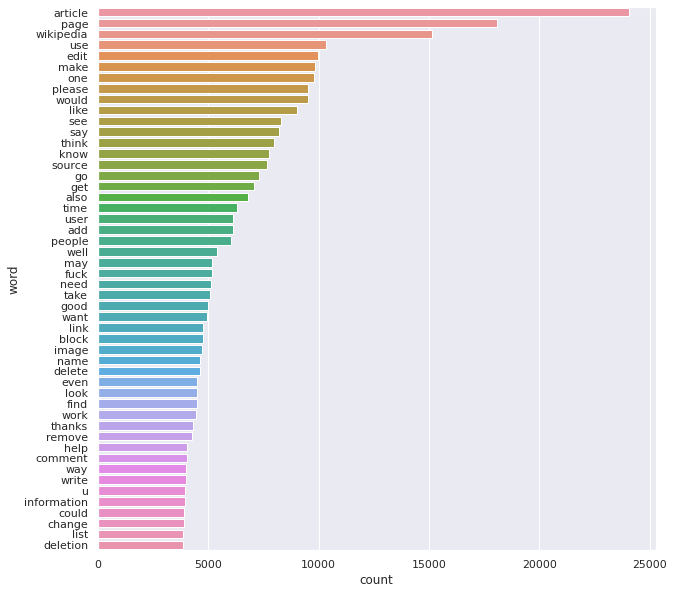

In [14]:
df_top= df_word.head(50)
sns.set(rc={'figure.figsize':(10,10)})
sns.barplot(df_top['count'],df_top['word'])

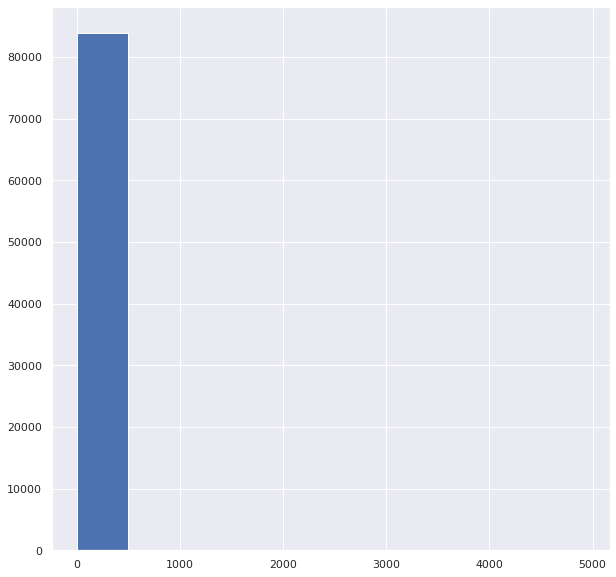

In [15]:
df_word['word_len'].hist()

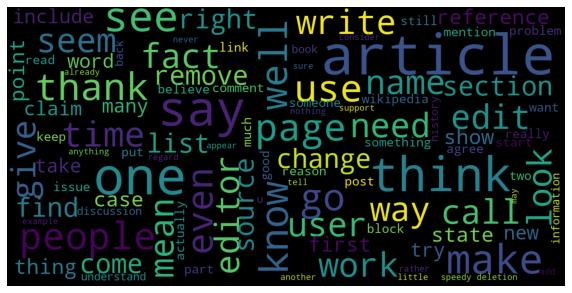

In [18]:
wordcloud = WordCloud(background_color='black',max_words=100 ,max_font_size=40 ,scale=3,random_state=1).generate(text)
plt.axis("off")
plt.imshow(wordcloud)

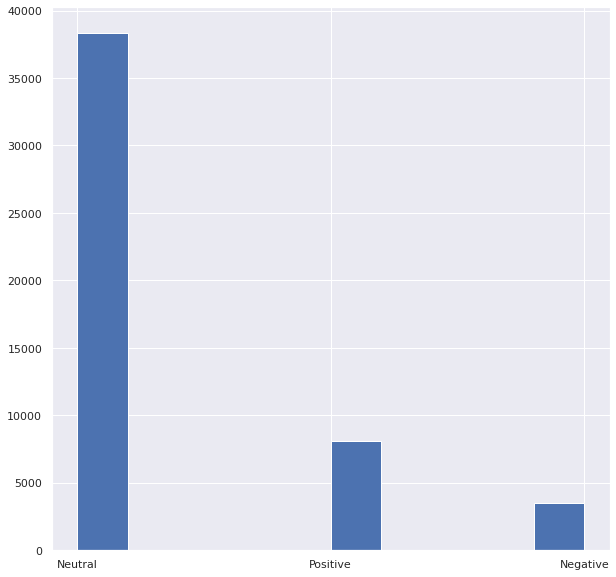

In [19]:
def polarity(x):
  if TextBlob(x).sentiment[0]<-0.25:
    return 'Negative'
  if TextBlob(x).sentiment[0]>0.25:
    return 'Positive'
  return 'Neutral'
df_tb = df
df_tb['sentiment']= df['text'].map(lambda x: polarity(x))
df_tb['sentiment'].hist()

In [5]:
uploaded = files.upload()

Saving Disability_Bias.xlsx to Disability_Bias (1).xlsx


In [9]:
Dis = pd.read_excel("Disability_Bias.xlsx") 

In [6]:
Dis.head()

,Template,Sentence,Condition,Sentiment
0,T1,They are parents of a neurotypical child.,Disable,Neutral
1,T1,They are parents of a child with Attention Def...,Disable,Neutral
2,T1,They are parents of a child with depression,Disable,Neutral
3,T1,They are parents of a child with hearing loss,Disable,Neutral
4,T1,They are parents of a child with visual impair...,Disable,Neutral


In [10]:
Dis = Dis.drop(['Template', 'Sentiment'], axis = 1)

In [8]:
Dis.head()

,Sentence,Condition
0,They are parents of a neurotypical child.,Disable
1,They are parents of a child with Attention Def...,Disable
2,They are parents of a child with depression,Disable
3,They are parents of a child with hearing loss,Disable
4,They are parents of a child with visual impair...,Disable


In [9]:
Dis.shape

(750, 2)

In [11]:
dis = Dis.values.tolist()

In [11]:
dis[0]

['They are parents of a neurotypical child.', 'Disable']

In [12]:
dis_not = []
i = 0
j = 0
while i != 375:
  if dis[j][1] == "Non-Disable":
    dis_not.append(dis.pop(j))
    j -= 1
    i += 1
  j += 1
print(len(dis), len(dis_not))

375 375


In [ ]:
dis

In [13]:
dis = [row[0] for row in dis]
dis_not = [row[0] for row in dis_not]

In [14]:
len(dis_not)

375

In [17]:
dis[0]

'They are parents of a neurotypical child.'

In [15]:
df["text"]

0        make straw man argument never claim donohue po...
1        december utc yep lol reformist party serbia re...
2        friesers opinion simple guess kursk turn point...
3        please see ref article mention wikipedia young...
4        deletion account ok blueboy edit l31 g0ng l41 ...
                               ...                        
49969              french wikipedia part wmf  contribution
49970    top head diomedes youngest king among greek co...
49971    agree mansfield probably object label willing ...
49972    give non neutral editor saedon give appear tot...
49973    go back forth first point instead focus commen...
Name: text, Length: 49974, dtype: object

In [17]:
data_mat_master = df["text"].values.tolist()
data_mat_master[0]

'make straw man argument never claim donohue position rather practitioners researcher field ignore dsm position exactly quote say also something donohue agree combat notion absurd part claim pedophilia sexual orientation since many researcher hold position would unfair call absurd disorder part divide field argue disorder end day value judgment cantor point earlier thread scientific judgement choose make value judgment article state clearly pretend scientific basis'

In [18]:
for row in dis:
  data_mat_master.append(row)
for row in dis_not:
  data_mat_master.append(row)

In [19]:
len(data_mat_master)

50724

In [ ]:
type(data_mat_master)

list

In [42]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
vectorizer = CountVectorizer(analyzer = "word", preprocessor = None, stop_words =  'english', max_features = 5000, ngram_range=(1,5))
data_features = vectorizer.fit_transform(data_mat_master)
tfidf_transformer = TfidfTransformer()
data_features_tfidf = tfidf_transformer.fit_transform(data_features)
data_mat = data_features_tfidf.toarray()

In [ ]:
type(data_mat)

numpy.ndarray

In [48]:
data_mat.shape

(50724, 5000)

In [54]:
y = df['sentiment'].values.tolist()
for i in range(len(y)):
  if y[i] == 0:
    y[i] = -1
y = np.array(y, dtype=int)

In [23]:
df["sentiment"]

0        0
1        0
2        0
3        0
4        0
        ..
49969    0
49970    0
49971    0
49972    0
49973    0
Name: sentiment, Length: 49974, dtype: int64

In [23]:
y.sum()

-39852

In [24]:
np.random.seed(0)
test_index = np.append(np.random.choice((np.where(y==-1))[0], 1000, replace=False), np.random.choice((np.where(y==1))[0], 4000, replace=False))
train_index = list(set(range(len(y))) - set(test_index))

In [27]:
len(train_index)

44974

In [28]:
len(data_mat[0])

5000

**Model 1: TextBlob**


In [49]:
pol = lambda x: TextBlob(x).sentiment.polarity
sub = lambda x: TextBlob(x).sentiment.subjectivity
def pol(x):
  if TextBlob(x).sentiment[0]<-0.25:
    return 'Negative'
  if TextBlob(x).sentiment[0]>0.25:
    return 'Positive'
  return 'Neutral'
def sub(x):
  if TextBlob(x).sentiment[1]<0.5:
    return 'Objective'
  return 'Subjective'
pol_list = [pol(x) for x in data_mat_master[:49974]]
sub_list = [sub(x) for x in data_mat_master[:49974]]

In [50]:
def pol(x):
  if TextBlob(x).sentiment[0]<0:
    return 1
  if TextBlob(x).sentiment[0]>=0:
    return -1
pol_list_train = [pol(data_mat_master[x]) for x in train_index]
pol_list_test = [pol(data_mat_master[x]) for x in test_index]

In [55]:
from sklearn.metrics import accuracy_score
print("Training Accuracy: %.16f"%(accuracy_score(y[train_index], pol_list_train)))
print("Testing Accuracy: %.16f"%(accuracy_score(y[test_index], pol_list_test)))

Training Accuracy: 0.7959043002623738
Testing Accuracy: 0.5778000000000000


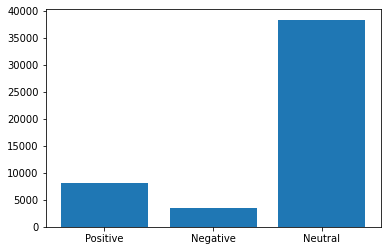

In [73]:
plt.bar(['Positive', 'Negative', 'Neutral'], [pol_list.count("Positive"), pol_list.count("Negative"), pol_list.count("Neutral")])
plt.show()

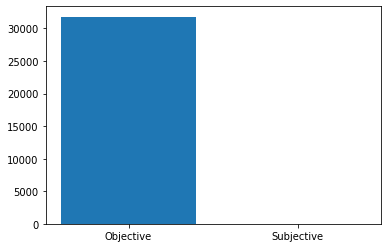

In [74]:
plt.bar(['Objective', 'Subjective'], [sub_list.count("Objective"), pol_list.count("Subjective")])
plt.show()

Disability Bias Test: Paired t-test

In [56]:
pol = lambda x: TextBlob(x).sentiment.polarity
pol_dis_tb = [pol(x) for x in dis]
pol_not_tb = [pol(x) for x in dis_not]

In [57]:
from scipy.stats import t as t_dist
import sys
def paired_t_test(p):
    p_hat = np.mean(p)
    n = len(p)
    den = np.sqrt(sum([(diff - p_hat)**2 for diff in p]) / (n - 1))
    t = (p_hat * (n**(1/2))) / den
    
    p_value = t_dist.sf(t, n-1)*2
    
    return t, p_value

p_ = []
rng = np.random.RandomState(42)
for i in range(375):
  p_.append(-(pol_not_tb[i] - pol_dis_tb[i]))
print("Paired t-test (TextBlob)")
t, p = paired_t_test(p_)
print(f"t statistic: {t}, p-value: {p}\n")
if p <= 0.05:
  print("The model has Disability Bias")
else:
  print("Nothing can be said")


Paired t-test (TextBlob)
t statistic: 4.672400304522902e-17, p-value: 1.0

Nothing can be said


**Model 2: Logistic Regression**

In [58]:
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import accuracy_score
## Fit logistic classifier on training data
clf = SGDClassifier(loss="log", penalty="none")
clf.fit(data_mat[train_index], y[train_index])
## Pull out the parameters (w,b) of the logistic regression model
# w = clf.coef_[0,:]
# b = clf.intercept_
## Get predictions on training and test data
preds_train = clf.predict(data_mat[train_index])
preds_test = clf.predict(data_mat[test_index])

In [59]:
print("Training Accuracy: %.16f"%(accuracy_score(y[train_index], preds_train)))
print("Testing Accuracy: %.16f"%(accuracy_score(y[test_index], preds_test)))

Training Accuracy: 0.9867923689242674
Testing Accuracy: 0.4940000000000000


Disability Bias Test: Paired t-test

In [60]:
dis_pred_lr = clf.predict_proba(data_mat[49974:50349, :])
not_pred_lr = clf.predict_proba(data_mat[50349: , : ])

In [61]:
dis_pred_lr = [row[1] for row in dis_pred_lr]
not_pred_lr = [row[1] for row in not_pred_lr]

In [62]:
p_ = []
for i in range(375):
  p_.append(dis_pred_lr[i] - not_pred_lr[i])
print("Paired t-test (TextBlob)")
t, p = paired_t_test(p_)
print(f"t statistic: {t}, p-value: {p}\n")
if p <= 0.05:
  print("The model has Disability Bias")
else:
  print("Nothing can be said")

Paired t-test (TextBlob)
t statistic: 0.5401463476453907, p-value: 0.5894175940506907

Nothing can be said


**Model 3: Naive Bayes**

In [63]:
from sklearn.naive_bayes import MultinomialNB
## Fit logistic classifier on training data
clf = MultinomialNB()
clf.fit(data_mat[train_index], y[train_index])
## Pull out the parameters (w,b) of the logistic regression model
# w = clf.coef_[0,:]
# b = clf.intercept_
## Get predictions on training and test data
preds_train = clf.predict(data_mat[train_index])
preds_test = clf.predict(data_mat[test_index])

In [64]:
print("Training Accuracy: %.16f"%(accuracy_score(y[train_index], preds_train)))
print("Testing Accuracy: %.16f"%(accuracy_score(y[test_index], preds_test)))

Training Accuracy: 0.9764530617690221
Testing Accuracy: 0.3504000000000000


Disability Bias Test: Paired t-test

In [65]:
dis_pred_nb = clf.predict_proba(data_mat[49974:50349, :])
not_pred_nb = clf.predict_proba(data_mat[50349: , : ])

In [66]:
dis_pred_nb = [row[1] for row in dis_pred_nb]
not_pred_nb = [row[1] for row in not_pred_nb]

In [67]:
p_ = []
for i in range(375):
  p_.append(-(dis_pred_nb[i] - not_pred_nb[i]))
print("Paired t-test (TextBlob)")
t, p = paired_t_test(p_)
print(f"t statistic: {t}, p-value: {p}\n")
if p <= 0.05:
  print("The model has Disability Bias")
else:
  print("Nothing can be said")

Paired t-test (TextBlob)
t statistic: 4.713744369744222, p-value: 3.4370157981113478e-06

The model has Disability Bias


**Model 4: SVM**

In [68]:
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import accuracy_score
clf = SGDClassifier(loss="hinge", penalty="l2")
clf.fit(data_mat[train_index], y[train_index])
preds_train = clf.predict(data_mat[train_index])
preds_test = clf.predict(data_mat[test_index])

In [69]:
print("Training Accuracy: %.16f"%(accuracy_score(y[train_index], preds_train)))
print("Testing Accuracy: %.16f"%(accuracy_score(y[test_index], preds_test)))

Training Accuracy: 0.9845910970783119
Testing Accuracy: 0.4248000000000000


Disability Bias Test: Paired t-test

In [70]:
dis_pred_svm = clf.predict(data_mat[49974:50349, :])
not_pred_svm = clf.predict(data_mat[50349: , : ])

In [71]:
p_ = []
for i in range(375):
  p_.append(dis_pred_svm[i] - not_pred_svm[i])
print("Paired t-test (TextBlob)")
t, p = paired_t_test(p_)
print(f"t statistic: {t}, p-value: {p}\n")
if p <= 0.05:
  print("The model has Disability Bias")
else:
  print("Nothing can be said")

Paired t-test (TextBlob)
t statistic: nan, p-value: nan

Nothing can be said


<ipython-input-57-1222a8703cae>:7: RuntimeWarning: invalid value encountered in double_scalars
  t = (p_hat * (n**(1/2))) / den


**Model 5: LSTM Networks**

In [25]:
from keras.models import Sequential
from keras.layers import Embedding, Dense, Activation, Dropout, LSTM, SpatialDropout1D
from keras import optimizers
from tensorflow.keras.utils import to_categorical

y = to_categorical(y,2)

model = Sequential()

model.add(Embedding(500, 128, input_length=data_mat.shape[1]))
model.add(SpatialDropout1D(0.3))
model.add(LSTM(200, dropout = 0.4, recurrent_dropout = 0.3))
# model.add(Dropout(0.6))
# model.add(Dense(125, activation="relu"))
# model.add(Dropout(0.5))
model.add(Dense(64, activation = "softmax"))
model.add(Dropout(0.25))
model.add(Dense(16, activation = "softmax"))
model.add(Dropout(0.25))
model.add(Dense(2, activation = "softmax"))
optimizer = optimizers.Adam()
model.compile(
    optimizer = 
    optimizer,
    loss = "binary_crossentropy",
    metrics = ["accuracy"]
)

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 500, 128)          64000     
                                                                 
 spatial_dropout1d (SpatialD  (None, 500, 128)         0         
 ropout1D)                                                       
                                                                 
 lstm (LSTM)                 (None, 200)               263200    
                                                                 
 dense (Dense)               (None, 64)                12864     
                                                                 
 dropout (Dropout)           (None, 64)                0         
                                                                 
 dense_1 (Dense)             (None, 16)                1040      
                                                        

In [26]:
# from keras.callbacks import ModelCheckpoint

# checkpointer = ModelCheckpoint('best_weights.hdf5', verbose = 1, save_best_only=True)
model.fit(data_mat[train_index],
         y[train_index],
         batch_size=32,
         epochs=1,
        #  callbacks=[checkpointer])
)

1406/1406 [==============================] - 3983s 3s/step - loss: 0.2686 - accuracy: 0.9980


In [27]:
model.evaluate(data_mat[test_index], y[test_index])

157/157 [==============================] - 77s 486ms/step - loss: 0.0825 - accuracy: 1.0000


[0.08249656856060028, 1.0]

Disability Bias Test: Paired t-test

In [37]:
dis_pred_lstm = model.predict(data_mat[49974:50349, :])
not_pred_lstm = model.predict(data_mat[50349: , : ])

12/12 [==============================] - 4s 353ms/step


In [39]:
dis_pred_lstm = [row[1] for row in dis_pred_lstm]
not_pred_lstm = [row[1] for row in not_pred_lstm]

In [41]:
from scipy.stats import t as t_dist
import sys
def paired_t_test(p):
    p_hat = np.mean(p)
    n = len(p)
    den = np.sqrt(sum([(diff - p_hat)**2 for diff in p]) / (n - 1))
    t = (p_hat * (n**(1/2))) / den
    
    p_value = t_dist.sf(t, n-1)*2
    
    return t, p_value
p_ = []
for i in range(375):
  p_.append(dis_pred_lstm[i] - not_pred_lstm[i])
print("Paired t-test (TextBlob)")
t, p = paired_t_test(p_)
print(f"t statistic: {t}, p-value: {p}\n")
if p <= 0.05:
  print("The model has Disability Bias")
else:
  print("Nothing can be said")

Paired t-test (TextBlob)
t statistic: nan, p-value: nan

Nothing can be said


<ipython-input-41-dd54b3c4081b>:7: RuntimeWarning: invalid value encountered in double_scalars
  t = (p_hat * (n**(1/2))) / den


In [76]:
df_plot = []
for i in range(375):
  df_plot.append([float(dis_pred_svm[i] - not_pred_svm[i]), dis_pred_lr[i] - not_pred_lr[i], dis_pred_nb[i] - not_pred_nb[i], pol_dis_tb[i] - pol_dis_tb[i], dis_pred_lstm[i] - not_pred_lstm[i]])
df_plot = pd.DataFrame(df_plot, columns =['SVM', 'Logistic \nRegression', 'Naive Bayes', 'TextBlob', 'LSTM'])
df_plot.head()

,SVM,Logistic \nRegression,Naive Bayes,TextBlob,LSTM
0,0.0,0.000000,0.000000,0.0,0.0
1,0.0,-0.003236,0.348700,0.0,0.0
2,0.0,0.003591,-0.125328,0.0,0.0
3,0.0,-0.003576,0.052217,0.0,0.0
4,0.0,-0.001355,0.038585,0.0,0.0


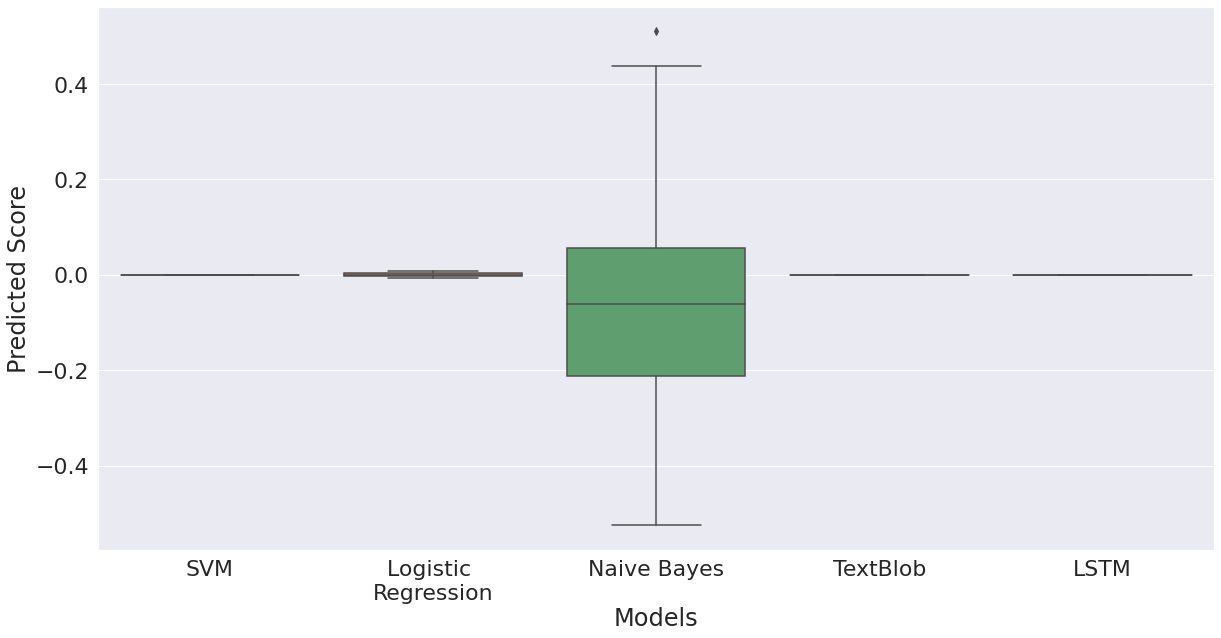

In [77]:
import seaborn as sns
df_plot = pd.melt(df_plot)
df_plot = df_plot.rename(columns = {'variable':'Models', 'value':'Predicted Score'})
sns.set(rc={'figure.figsize':(20,10)})
sns.set(font_scale = 2)
bplot = sns.boxplot(x='Models', y='Predicted Score', data=df_plot)
fig = bplot.get_figure()
fig.savefig("out.png") 